<a href="https://colab.research.google.com/github/sapna-90/Project_8_Career-trends-explorer/blob/main/P8_Career_trends_explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
Data = pd.read_csv(r"/content/P8_ all_upwork_jobs_2024-02-07-2024-03-24.csv")

In [3]:
Data.head(5)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [5]:
Data['is_hourly'] = Data['is_hourly'].astype('object')

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  object 
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: float64(3), object(5)
memory usage: 14.9+ MB


In [7]:
Data.duplicated().sum()

0

In [8]:
Data.isnull().sum().sort_values(ascending=False)

,0
hourly_high,146053
hourly_low,142406
budget,140937
country,5077
title,1
link,1
published_date,0
is_hourly,0


In [9]:
numerical_cols = Data.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each numerical column and fill missing values
for col in numerical_cols:
    Data[col] = Data[col].fillna(Data[col].mean(0))

In [10]:
categorical_cols = Data.select_dtypes(include=['object']).columns

# Iterate through each numerical column and fill missing values
for col in categorical_cols:
    Data[col] = Data[col].fillna(Data[col].mode()[0])

<ipython-input-10-8eb52dd9d2fa>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data[col] = Data[col].fillna(Data[col].mode()[0])


In [11]:
Data.isnull().sum().sort_values(ascending=False)

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0


In [12]:
numerical_cols = Data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = Data.select_dtypes(include=['object']).columns

In [13]:
# Create the list of numerical data
numerical_data=[]
for i in Data.columns:
  if Data[i].dtype!='object':
    numerical_data.append(i)
numerical_data

['is_hourly', 'hourly_low', 'hourly_high', 'budget']

In [14]:
## now to create a list of categorical data
categorical_data=[]
for i in Data.columns:
  if Data[i].dtype=='object':
    categorical_data.append(i)
categorical_data

['title', 'link', 'published_date', 'country']

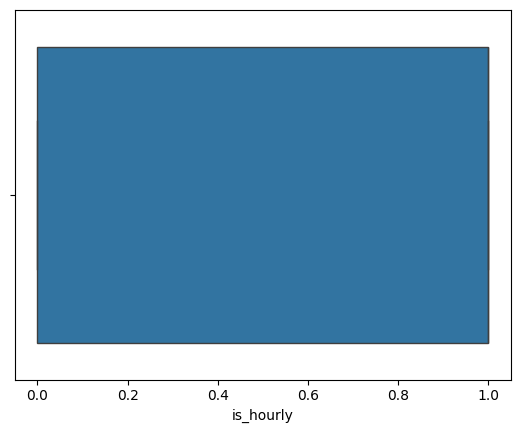

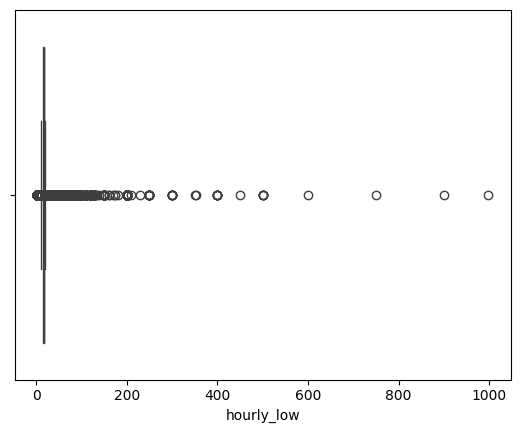

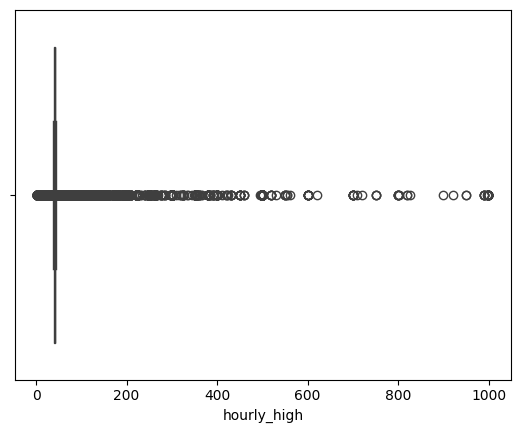

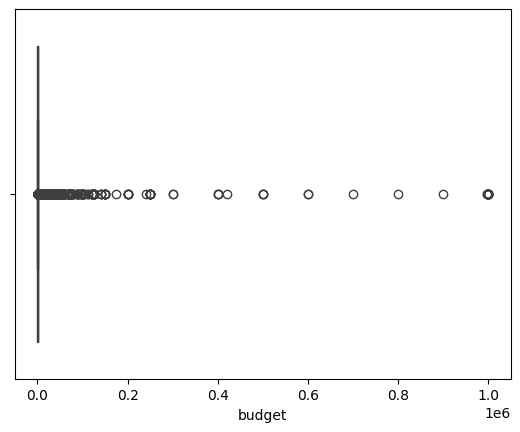

In [15]:
for i in numerical_data:
  sns.boxplot(x=i,data=Data)
  plt.show()

In [16]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define the lower and upper bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows that have outliers in the current column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [17]:
Data.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [18]:
columns_to_check = ['hourly_low', 'hourly_high', 'budget']

In [19]:
cleaned_data = remove_outliers(Data, columns_to_check)

In [20]:
print("Data shape before removing outliers:", Data.shape)
print("Data shape after removing outliers:", cleaned_data.shape)

Data shape before removing outliers: (244828, 8)
Data shape after removing outliers: (138452, 8)


In [21]:
cleaned_data.to_csv('Project_8.csv', index=False)

In [22]:
Cleaned_Dataset = pd.read_csv(r"/content/Project_8.csv")

In [23]:
Cleaned_Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

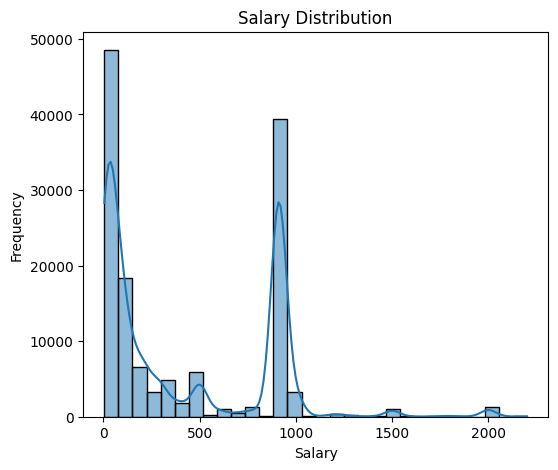

In [24]:
# Visualization: Initial overview of salary trends
plt.figure(figsize=(6, 5))
sns.histplot(Cleaned_Dataset['budget'], kde=True, bins=30)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

**Task 1: Analyzing Keywords and Salaries**


In [25]:
# Analyze the relationship between keywords in job titles and salaries
from wordcloud import WordCloud

In [26]:
# Extract job title keywords
job_titles = Cleaned_Dataset['title'].str.lower().str.split().explode()

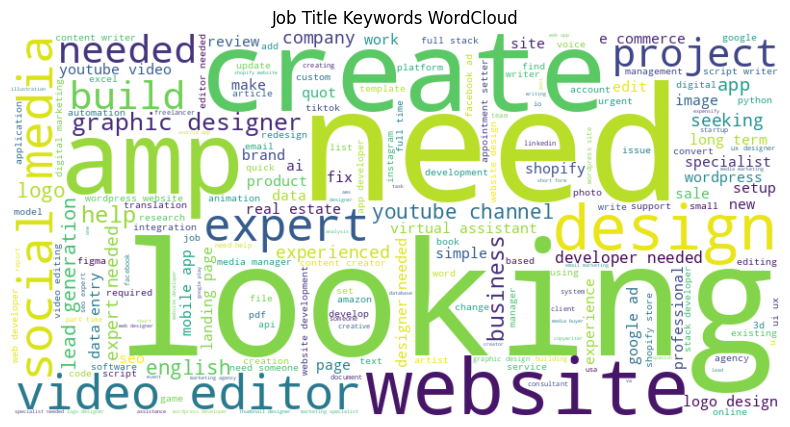

In [27]:
# Generate a WordCloud for job title keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(job_titles))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Job Title Keywords WordCloud")
plt.show()

In [28]:
Cleaned_Dataset.head(5)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,17.339644,41.97061,500.000000,United States
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,17.339644,41.97061,1100.000000,United States
2,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,17.339644,41.97061,911.473564,United States
3,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,17.339644,41.97061,650.000000,India
4,SEO for Portuguese Psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41+00:00,True,17.339644,41.97061,911.473564,Portugal


In [29]:
# Analyze the correlation between keywords and salaries
# Create a new column with unique keywords for each job title
Cleaned_Dataset['keywords'] = Cleaned_Dataset['title'].str.lower().str.split().apply(lambda x: ','.join(set(x)))

# Group by the unique keywords and calculate the mean salary
keyword_salaries = Cleaned_Dataset.groupby('keywords')['budget'].mean().sort_values(ascending=False)

print("Top Keywords with Salaries:")
print(keyword_salaries.head(5))


Top Keywords with Salaries:
keywords
fs,(js,,senior,react,,python,,developer,django)              2200.0
render,drawings,fly,&amp;,model,fix,thrus,,ext+int,,3d       2200.0
graphic,packaging,time,web,,-,designer,email,,design,full    2200.0
and,nutrition,online,coach,longterm,fitness                  2200.0
angel,and,3,numbers,2,books                                  2200.0
Name: budget, dtype: float64


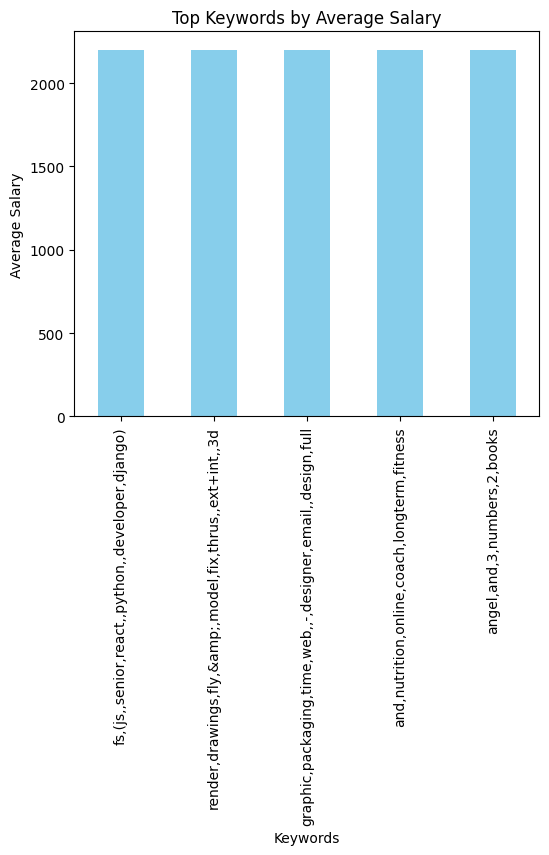

In [30]:
# Visualize top keywords by average salary
keyword_salaries.head(5).plot(kind='bar', color='skyblue', figsize=(6, 5))
plt.title("Top Keywords by Average Salary")
plt.xlabel("Keywords")
plt.ylabel("Average Salary")
plt.show()

**Task 2: Identifying Emerging Job Categories**

In [31]:
Cleaned_Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'keywords'],
      dtype='object')

In [32]:
Cleaned_Dataset.head(5)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,17.339644,41.97061,500.000000,United States,"and,solar,buyer,experienced,media,for,installa..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,17.339644,41.97061,1100.000000,United States,"full,developer,stack"
2,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,17.339644,41.97061,911.473564,United States,"specialized,hunter,in,talent,marketing"
3,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,17.339644,41.97061,650.000000,India,"engineer,data"
4,SEO for Portuguese Psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41+00:00,True,17.339644,41.97061,911.473564,Portugal,"seo,for,psychologist,portuguese,site"


In [33]:
# Remove timezone information

Cleaned_Dataset['published_date'] = pd.to_datetime(Cleaned_Dataset['published_date'])

Cleaned_Dataset['published_date'] = Cleaned_Dataset['published_date'].dt.tz_localize(None)

In [34]:
# Analyze job categories over time
Cleaned_Dataset['published_date'] = pd.to_datetime(Cleaned_Dataset['published_date'])
job_category_trends = Cleaned_Dataset.groupby(['title', Cleaned_Dataset['published_date'].dt.to_period('M')])['title'].count().unstack(fill_value=0)

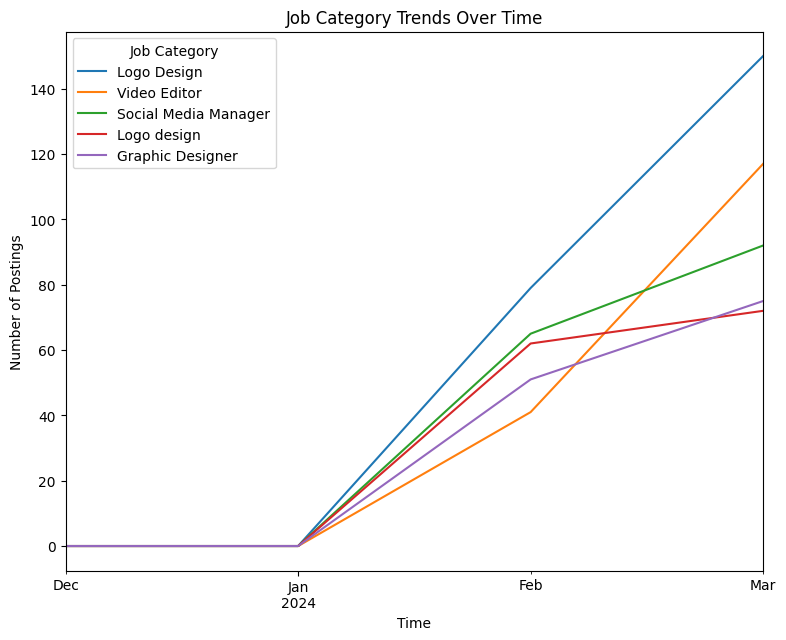

In [35]:
# Plot emerging job categories over time
top_categories = job_category_trends.sum(axis=1).nlargest(5).index  # Top 5 categories by total postings
job_category_trends.loc[top_categories].T.plot(figsize=(9, 7))
plt.title("Job Category Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Postings")
plt.legend(title="Job Category")
plt.show()

In [36]:
# Calculate growth rate for job categories
growth_rates = job_category_trends.iloc[:, -1] - job_category_trends.iloc[:, 0]
emerging_categories = growth_rates.sort_values(ascending=False).head(10)
print("Emerging Job Categories:")
print(emerging_categories)

Emerging Job Categories:
title
Logo Design             150
Video Editor            117
Social Media Manager     92
Graphic Designer         75
Logo design              72
Logo Designer            57
Virtual Assistant        57
Lead Generation          51
Website Development      43
YouTube Video Editor     43
dtype: int64


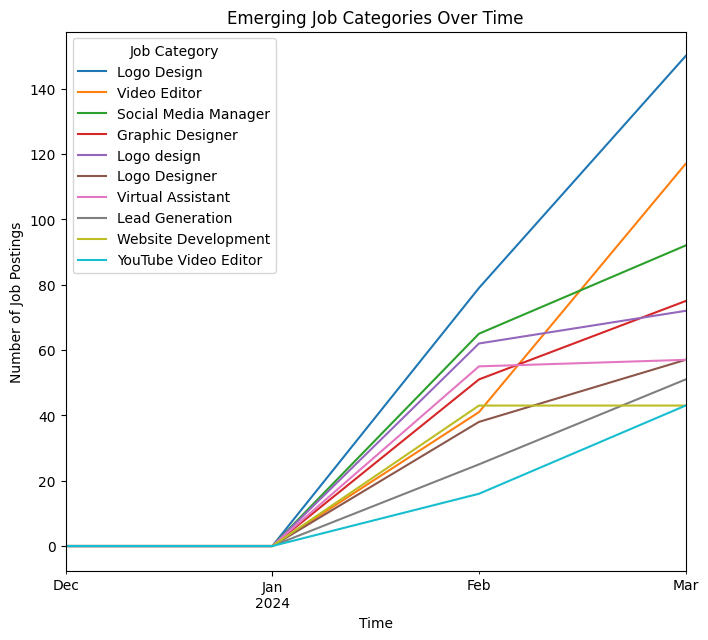

In [37]:
# Visualize time-series data
job_category_trends.loc[emerging_categories.index].T.plot(figsize=(8, 7))
plt.title("Emerging Job Categories Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Job Postings")
plt.legend(title="Job Category")
plt.show()

**Task 3: Forecasting High-Demand Roles**

In [38]:
# Prepare data for regression
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
Cleaned_Dataset['job_category_encoded'] = le.fit_transform(Cleaned_Dataset['title'])
X = Cleaned_Dataset[['job_category_encoded', 'hourly_low']]  # Example predictors
y = Cleaned_Dataset['hourly_high']  # Example target

In [40]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#  Linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Model RMSE: {rmse}, R^2: {r2}")

Model RMSE: 7.105427357601002e-15, R^2: 0.0


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [44]:
X = Cleaned_Dataset[['job_category_encoded', 'hourly_low']]  # Example predictors
y = Cleaned_Dataset['hourly_high']  # Example target

In [45]:
# Scale data
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [47]:
# Creating the pipeline with a RandomForest model
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [48]:
# Training the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [49]:
# Predict and evaluate the model

from sklearn.metrics import mean_squared_error, r2_score
predictions = model_pipeline.predict(X_test)
print(f" R2 Score {r2_score(predictions, y_test)}")
print(f" mean_squared_error {mean_squared_error(predictions, y_test)}")
print(f" Root mean_squared_error {np.sqrt(mean_squared_error(predictions, y_test))}")
print(f" mean_absolute_error {mean_absolute_error(predictions, y_test)}")

 R2 Score -31024899.0
 mean_squared_error 1.5663571646970476e-21
 Root mean_squared_error 3.957723038183758e-11
 mean_absolute_error 3.957723038183758e-11


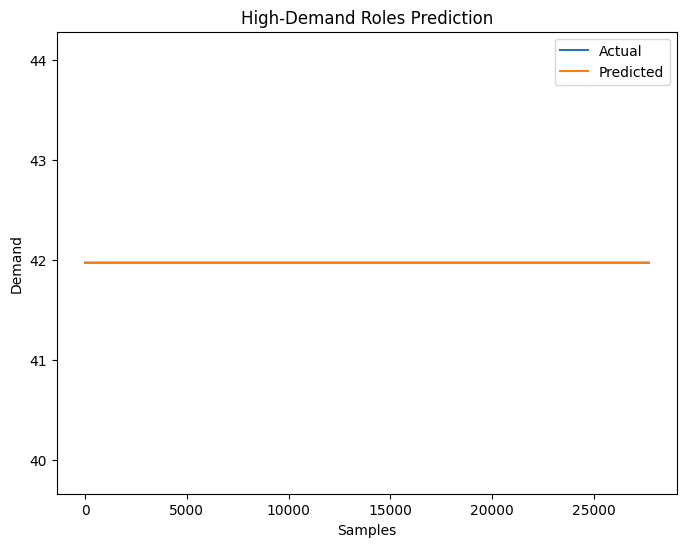

In [51]:
# Visualization of predictions
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("High-Demand Roles Prediction")
plt.xlabel("Samples")
plt.ylabel("Demand")
plt.show()